In [ ]:
# pip install transformers

Text Classification

In [ ]:
import pandas as pd
from transformers import pipeline


In [ ]:
help(pipeline)

Help on function pipeline in module transformers.pipelines:

pipeline(task: Optional[str] = None, model: Union[str, ForwardRef('PreTrainedModel'), ForwardRef('TFPreTrainedModel'), NoneType] = None, config: Union[str, transformers.configuration_utils.PretrainedConfig, NoneType] = None, tokenizer: Union[str, transformers.tokenization_utils.PreTrainedTokenizer, ForwardRef('PreTrainedTokenizerFast'), NoneType] = None, feature_extractor: Union[ForwardRef('SequenceFeatureExtractor'), str, NoneType] = None, image_processor: Union[str, transformers.image_processing_utils.BaseImageProcessor, NoneType] = None, processor: Union[str, transformers.processing_utils.ProcessorMixin, NoneType] = None, framework: Optional[str] = None, revision: Optional[str] = None, use_fast: bool = True, token: Union[str, bool, NoneType] = None, device: Union[int, str, ForwardRef('torch.device'), NoneType] = None, device_map: Union[str, dict[str, Union[int, str]], NoneType] = None, dtype: Union[str, ForwardRef('torch.d

In [ ]:
classifier = pipeline('text-classification') # can pass model name here

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
text = 'It was possible for him easily. So he did it.'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,POSITIVE,0.996886


In [ ]:
text = 'It was impossible for him easily. So he didn\'t do it.'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,NEGATIVE,0.998778


In [ ]:
text = 'It was possible for him easily. So he did it.'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,POSITIVE,0.996886


In [ ]:
text = 'It was the worst movie. Waste of time and money.'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,NEGATIVE,0.999761


Text classification is like sentiment analysis here.

In [ ]:
text = 'It is possible for him. So he would have done it.'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,NEGATIVE,0.96275


In [ ]:
text = 'This guy next to me talks a lot in between. Why guys like him are there?'
result = classifier(text)
df = pd.DataFrame(result)
df

,label,score
0,NEGATIVE,0.975647


Question Answering

In [ ]:
qa = pipeline('question-answering')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
text = 'mumbai is capital of Maharashtra.'
q = 'What is capital of Maharashtra?'
result = qa(question=q, context=text)
result

{'score': 0.9987599246960599, 'start': 0, 'end': 6, 'answer': 'mumbai'}

In [ ]:
result['answer']

'mumbai'

In [ ]:
text = """Cricket is a bat-and-ball game that is played between two teams of eleven players on a field, at the centre of which is a 22-yard (20-metre; 66-foot) pitch with a wicket at each end, each comprising two bails (small sticks) balanced on three stumps. Two players from the batting team, the striker and nonstriker, stand in front of either wicket holding bats, while one player from the fielding team, the bowler, bowls the ball toward the striker's wicket from the opposite end of the pitch. The striker's goal is to hit the bowled ball with the bat and then switch places with the nonstriker, with the batting team scoring one run for each of these swaps. Runs are also scored when the ball reaches the boundary of the field or when the ball is bowled illegally.

The fielding team aims to prevent runs by dismissing batters (so they are "out"). Dismissal can occur in various ways, including being bowled (when the ball hits the striker's wicket and dislodges the bails), and by the fielding side either catching the ball after it is hit by the bat but before it hits the ground, or hitting a wicket with the ball before a batter can cross the crease line in front of the wicket. When ten batters have been dismissed, the innings (playing phase) ends and the teams swap roles. Forms of cricket range from traditional Test matches played over five days to the newer Twenty20 format (also known as T20), in which each team bats for a single innings of 20 overs (each "over" being a set of 6 fair opportunities for the batting team to score) and the game generally lasts three to four hours.

Traditionally, cricketers play in all-white kit, but in limited overs cricket, they wear club or team colours. In addition to the basic kit, some players wear protective gear to prevent injury caused by the ball, which is a hard, solid spheroid made of compressed leather with a slightly raised sewn seam enclosing a cork core layered with tightly wound string.

The earliest known definite reference to cricket is to it being played in South East England in the mid-16th century. It spread globally with the expansion of the British Empire, with the first international matches in the second half of the 19th century. The game's governing body is the International Cricket Council (ICC), which has over 100 members, twelve of which are full members who play Test matches. The game's rules, the Laws of Cricket, are maintained by Marylebone Cricket Club (MCC) in London. The sport is primarily played in India, Pakistan, Bangladesh, Sri Lanka, Afghanistan, Australia, New Zealand, England and Wales, South Africa and the West Indies.[2]

While cricket has traditionally been played largely by men, women's cricket has experienced significant growth in the 21st century.[3]

The most successful side playing international cricket is Australia, which has won eight One Day International trophies, including six World Cups, more than any other country, and has been the top-rated Test side more than any other country.[4][5] """



In [ ]:
q = 'what is cricket'
res = qa(question=q, context=text)
res

{'score': 0.1317240446805954,
 'start': 2421,
 'end': 2444,
 'answer': 'Marylebone Cricket Club'}

In [ ]:
q = 'how many overs in T20 format?'
res = qa(question=q, context=text)
res

{'score': 1.249639093875885, 'start': 1451, 'end': 1453, 'answer': '20'}

In [ ]:
qa?

In [ ]:
q = 'why are we here'
res = qa(question=q, context=text)
res['answer']

"The game's rules, the Laws of Cricket"

NER Tagging - also token classification

In [ ]:
ner = pipeline('ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [ ]:
res = ner(text)
res = pd.DataFrame(res)
res

,entity,score,index,word,start,end
0,I-MISC,0.989598,315,Twenty20,1366,1374
1,I-MISC,0.929031,321,T,1397,1398
2,I-MISC,0.913554,322,##20,1398,1400
3,I-LOC,0.862886,458,South,2028,2033
4,I-MISC,0.397639,459,East,2034,2038
5,I-LOC,0.997250,460,England,2039,2046
6,I-MISC,0.979832,476,British,2117,2124
7,I-MISC,0.739217,501,International,2243,2256
8,I-ORG,0.953252,503,Council,2265,2272
9,I-ORG,0.958732,505,ICC,2274,2277


In [ ]:
text = "Mark Zuckerberg will meet Aditya Joshi on 26 November, 2001 to discuss for a trade deal of $ 3 billion in Pune."

res = ner(text)
res = pd.DataFrame(res)
res

,entity,score,index,word,start,end
0,I-PER,0.999642,1,Mark,0,4
1,I-PER,0.998844,2,Z,5,6
2,I-PER,0.956425,3,##uck,6,9
3,I-PER,0.824307,4,##er,9,11
4,I-PER,0.994845,5,##berg,11,15
5,I-PER,0.999685,8,Ad,26,28
6,I-PER,0.998441,9,##ity,28,31
7,I-PER,0.998896,10,##a,31,32
8,I-PER,0.999082,11,Josh,33,37
9,I-PER,0.992443,12,##i,37,38


In [ ]:
ner = pipeline('ner', model='FacebookAI/xlm-roberta-large-finetuned-conll03-english')

Some weights of the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForTokenClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


In [ ]:
text = "Mark Zuckerberg will meet Aditya Joshi on 26 November, 2001 to discuss for a trade deal of $ 3 billion in Pune."

res = ner(text)
res = pd.DataFrame(res)
res

,entity,score,index,word,start,end
0,I-PER,0.999997,1,▁Mark,0,4
1,I-PER,0.999997,2,▁Zuckerberg,5,15
2,I-PER,0.999994,5,▁Adi,26,29
3,I-PER,0.999988,6,tya,29,32
4,I-PER,0.999992,7,▁Josh,33,37
5,I-PER,0.999989,8,i,37,38
6,I-LOC,0.999986,25,▁Pune,106,110


# Translation

```
# This is formatted as code
```



In [ ]:
trans = pipeline('translation_en_to_fr')

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
text = trans("How are you? Welcome to Python Programming Language.")
print(text)

[{'translation_text': 'Bienvenue à Python Programming Language.'}]


In [ ]:
new_trns = pipeline('translation','facebook/nllb-200-distilled-600M')

Device set to use cuda:0


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
model = 'facebook/nllb-200-distilled-600M'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSeq2SeqLM.from_pretrained(model)

In [ ]:
english_text = 'NLP is fascinating field of AI'
inputs = tokenizer(english_text, return_tensors='pt')


In [ ]:
translated_tokens = model.generate(**inputs,
               forced_bos_token_id = tokenizer.encode('deu_Latn')[0],
               max_length = 50)

In [ ]:
translation = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]

In [ ]:
translation

'NLP is a fascinating field of AI'

# TEXT GENERATION

In [ ]:
# generator = pipeline('text-generation', 'openai/gpt-oss-120b') not downloading

config.json: 0.00B [00:00, ?B/s]

MXFP4 quantization requires Triton and kernels installed: CUDA requires Triton >= 3.4.0, XPU requires Triton >= 3.5.0, we will default to dequantizing the model to bf16


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model-00000-of-00014.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00006-of-00014.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00003-of-00014.safetensors:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

model-00005-of-00014.safetensors:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

model-00004-of-00014.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00001-of-00014.safetensors:   0%|          | 0.00/4.12G [00:00<?, ?B/s]

model-00007-of-00014.safetensors:   0%|          | 0.00/4.06G [00:00<?, ?B/s]

model-00002-of-00014.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

model-00008-of-00014.safetensors:   0%|          | 0.00/4.63G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
generator = pipeline('text-generation', model='gpt2')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
data = generator("I want to learn Python programming so", max_length=30, num_return_sequences=3)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [ ]:
print(data[0]['generated_text'])

I want to learn Python programming so I can write Python scripts. I want to learn how to build a web application on top of Python. I want to learn how to create apps for Android. I want to learn how to learn how to create libraries in Python. I want to learn how to write and test apps for Android. I want to learn how to create and test REST APIs in Python. I want to learn how to make apps for iOS. I want to learn how to create a web app on top of Python. I want to learn how to create and test REST APIs in Python. I want to learn how to write and test REST APIs in Python. I want to learn how to build and test applications for iOS. I want to teach my students Python. I want to learn how to make Python apps for Android. I want to learn how to create and test REST APIs in Python. I want to learn how to create and test REST APIs in Python. I want to teach my students Python. I want to teach my students Python.

I want to teach my students Python. I want to teach my students Python. I want t

## Conversational

In [ ]:
# from transformers import Conversation  -----> DEPRECATED

## Visual Question Answering

In [ ]:
qa = pipeline('visual-question-answering')

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [ ]:
from PIL import Image

In [ ]:
img = Image.open('img.jpeg')

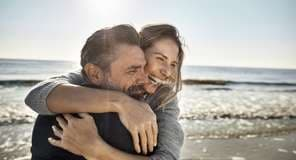

In [ ]:
img

In [ ]:
ans = qa(image=img, question='What is present in the image?')
ans

[{'score': 0.10629598796367645, 'answer': 'couple'},
 {'score': 0.0682058036327362, 'answer': '2'},
 {'score': 0.06359972804784775, 'answer': 'people'},
 {'score': 0.04875434562563896, 'answer': '2 people'},
 {'score': 0.0356609933078289, 'answer': 'baby'}]

In [ ]:
ans = qa(image=img, question='What is happening in the image?')
ans

[{'score': 0.15717829763889313, 'answer': 'kissing'},
 {'score': 0.11225336790084839, 'answer': 'holding baby'},
 {'score': 0.04682793468236923, 'answer': 'hugging'},
 {'score': 0.04246197268366814, 'answer': 'nothing'},
 {'score': 0.03510047867894173, 'answer': 'swimming'}]

In [ ]:
ans = qa(image=img, question='Can you give description of image?')
ans

[{'score': 0.775969922542572, 'answer': 'yes'},
 {'score': 0.34904012084007263, 'answer': 'no'},
 {'score': 0.006708020810037851, 'answer': 'family'},
 {'score': 0.004392476286739111, 'answer': 'couple'},
 {'score': 0.00373853393830359, 'answer': 'baby'}]

In [ ]:
ans = qa(image=img, question='What is color of objects present?')
ans

[{'score': 0.43837422132492065, 'answer': 'white'},
 {'score': 0.38794881105422974, 'answer': 'gray'},
 {'score': 0.3069682717323303, 'answer': 'blue'},
 {'score': 0.17456117272377014, 'answer': 'brown'},
 {'score': 0.07873030006885529, 'answer': 'black'}]

In [ ]:
ans = qa(image=img, question='You mentioned color of humans as color of object. Are you racist?')
ans

[{'score': 0.6810622215270996, 'answer': 'yes'},
 {'score': 0.38197994232177734, 'answer': 'no'},
 {'score': 0.30784720182418823, 'answer': 'white'},
 {'score': 0.06725198775529861, 'answer': 'black'},
 {'score': 0.04536972939968109, 'answer': 'red'}]

In [ ]:
ans = qa(image=img, question='What is in the background?', topn=1)
ans[0]['answer']

'ocean'

In [ ]:
ans = qa(image=img, question='What is the emotion?')
ans[0]['answer']

'happy'

## Text to speech

In [ ]:
tts = pipeline('text-to-speech', model='suno/bark-small')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text = "चिराग शर्मा चुप हो जाओ"
output = tts(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
from IPython.display import Audio
Audio(output['audio'], rate=output['sampling_rate'])

# Text Summarization

In [ ]:
text_summarizer = pipeline('summarization')
text = '''Hirdesh "Honey" Singh (born 15 March 1983), known professionally as Yo Yo Honey Singh, is an Indian singer and music producer. He commenced his career as a hip-hop music producer in 2003, working as a session and recording artist within the underground music scene until the release of his debut studio album, International Villager. '''



No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
output = text_summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
output[0]['summary_text']

In [ ]:
asr = pipeline('automatic-speech-recognition')

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
output = asr("download.wav")